In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("restaurant.csv")
df.sample(5)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
8057,3000129,8m_s7iOGJ8MfWFSGt3OFng,2CLNnQe2sIGc0bd2cvsPbg,RESDUcs7fIiihp38-d6_6g,3,0,0,0,"I came to Las Vegas and everyone said ""You hav...",2019-09-19 04:56:37
7948,2988932,lWQcmw_pjAl411LU7lUJZg,DokbdCS20re-Jo-OqKRilQ,RESDUcs7fIiihp38-d6_6g,4,1,0,0,The only reason I didn't give it 5 stars is be...,2014-03-10 19:28:06
7891,2983117,CiCjjqOpAx4sCf_8sdqjOQ,CvPB8JUJ7MCvg5KSPQrEwA,RESDUcs7fIiihp38-d6_6g,5,1,0,1,Hands down the best Buffet I've had in Vegas. ...,2018-10-31 20:30:46
4091,2678879,dzoKFnZ_WPaaYMQaHbDXfA,JXHrhT72U6sZJQSkFfNzjw,RESDUcs7fIiihp38-d6_6g,5,3,0,0,Best buffet in Vegas. It's what other buffets...,2013-01-13 00:28:15
538,2411478,nna8sWcX7lVWXxx8HrWRgg,1RyYQhnQu_OI51Vy6oahCA,RESDUcs7fIiihp38-d6_6g,5,1,0,0,"The best buffet in Las Vegas, no long lines to...",2014-07-29 02:13:15


In [3]:
df=df[['stars','text']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   10417 non-null  int64 
 1   text    10417 non-null  object
dtypes: int64(1), object(1)
memory usage: 162.9+ KB


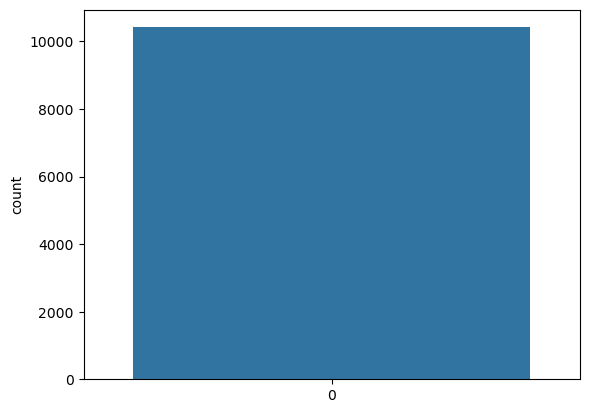

In [5]:
sns.countplot(df['stars']);

In [6]:
df['stars'].value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

In [7]:
df.sample(5)

,stars,text
3110,4,We tried this for the first time after having ...
1449,4,Had Brunch here today. I went around 10:00 am....
9467,1,My experience actually happened around May 201...
8576,3,We read so much about this buffet before headi...
5488,5,The best buffet I've been to (i've yet to try ...


In [8]:
df["text"]=df["text"].str.lower()
df["text"]=df["text"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırı
df["text"]=df["text"].str.replace("\d+","") #d digit rakamları kaldır
df["text"]=df["text"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \r

In [9]:
df.loc[df['stars']==3,"sentiment"]="neutral"
df.loc[df['stars']<3,"sentiment"]="negative"
df.loc[df['stars']>3,"sentiment"]="positive"

<Axes: xlabel='sentiment', ylabel='count'>

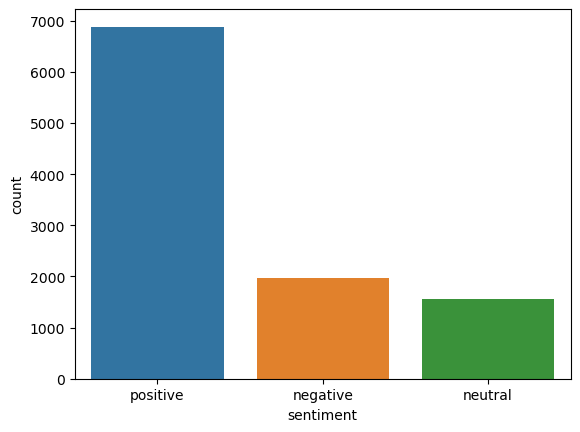

In [11]:
sns.countplot(x=df['sentiment'])

In [12]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
from langdetect import detect_langs
language = [detect_langs(i) for i in df.text]
languages = [str(i[0]).split(':')[0] for i in language]
df['language'] = languages

In [ ]:
#sns.countplot(x= df['language'])

In [15]:
df=df[df['language']=='en']
df.reset_index(drop=True,inplace=True)

In [16]:
x,y=df['text'],df['sentiment']

In [18]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
10369    positive
10370    positive
10371    positive
10372    positive
10373    positive
Name: sentiment, Length: 10374, dtype: object

In [19]:
def tokenize_test(vect,x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    print(y_train)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    #algos=[g,b,SVC,KN,D,R,Log,XGBC]
    #algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    algos=[g,b,SVC]
    algo_names=['GaussianNB','BernoulliNB','SVC']
    
    
    
    accuracy_scored=[]    
        
    x_train_dtm=vect.fit_transform(x_train).toarray()
    x_test_dtm=vect.transform(x_test).toarray()
    
    for item in algos:
        item.fit(x_train_dtm,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test_dtm)))
    result=pd.DataFrame(accuracy_scored,columns=['accuracy_score'],index=algo_names)
    result.accuracy_score=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)  

In [20]:
vect=CountVectorizer()
tokenize_test(vect,x,y)

(8299,) (2075,) (8299,) (2075,)
3920      neutral
3427      neutral
173      positive
4086     positive
1381     positive
           ...   
10339    positive
6543      neutral
1418     positive
3137     positive
2253     negative
Name: sentiment, Length: 8299, dtype: object


,accuracy_score
SVC,0.775904
BernoulliNB,0.693976
GaussianNB,0.399036


In [20]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [21]:
negative_data=df[df['sentiment']=="negative"]['text']
positive_data=df[df['sentiment']=="positive"]['text']
neutral_data=df[df['sentiment']=="neutral"]['text']

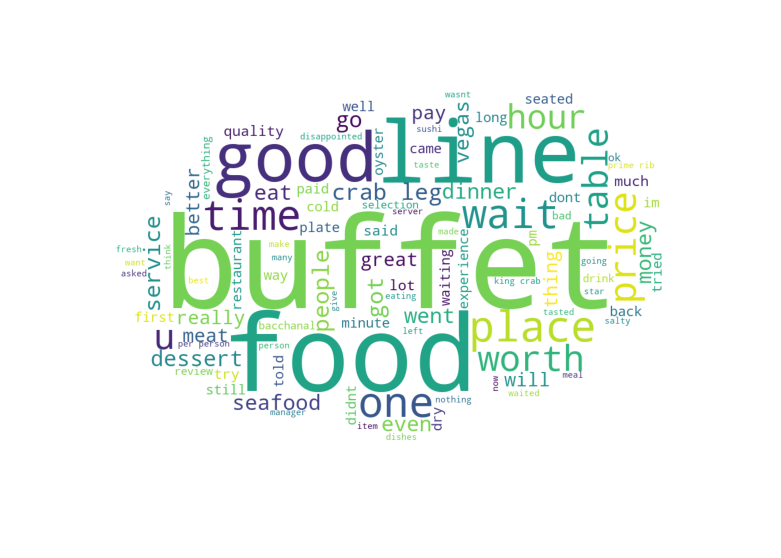

In [22]:
wc(negative_data,'white')

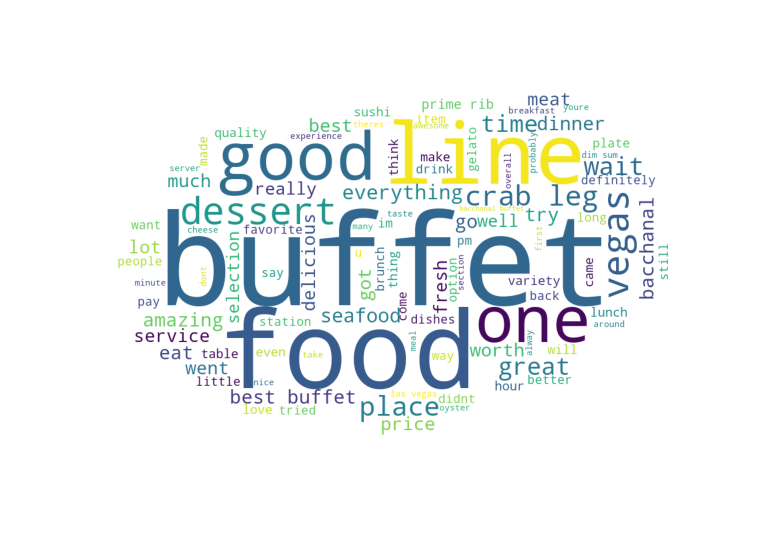

In [26]:
wc(positive_data,'white')

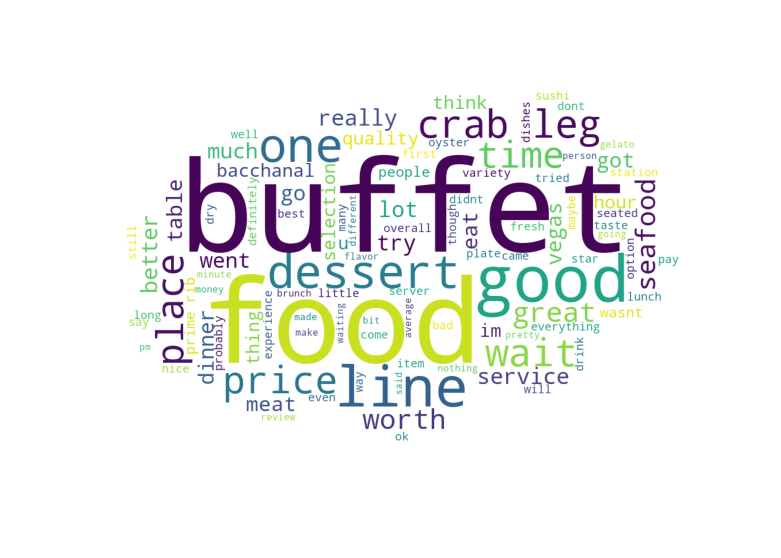

In [27]:
wc(neutral_data,'white')